<a href="https://colab.research.google.com/github/pazambrano/Aprendizaje-Automatico-Inicial/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [6]:
# Paquetes necesarios
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [2]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data'
df = pd.read_csv(url, sep='\s+', header=None)

# Asignar nombres a las columnas según la descripción
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = columns

# Mostrar las primeras filas para verificar
display(df.head())

# 1. Número y nombre de los atributos
print("Número de atributos:", df.shape[1])
print("Nombres de los atributos:", df.columns.tolist())

# 2. Número de filas del conjunto de datos
print("Número de filas:", df.shape[0])

# 3. Verificar si hay "missing values"
print("Valores faltantes por columna:\n", df.isnull().sum())

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2398742899.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep='\s+', header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Número de atributos: 14
Nombres de los atributos: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Número de filas: 506
Valores faltantes por columna:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de la variable CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64




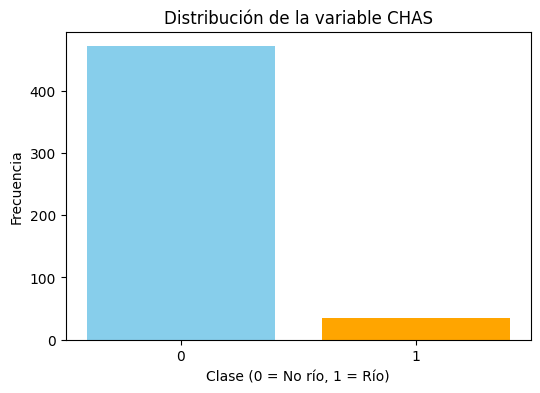

Estadísticos descriptivos básicos:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


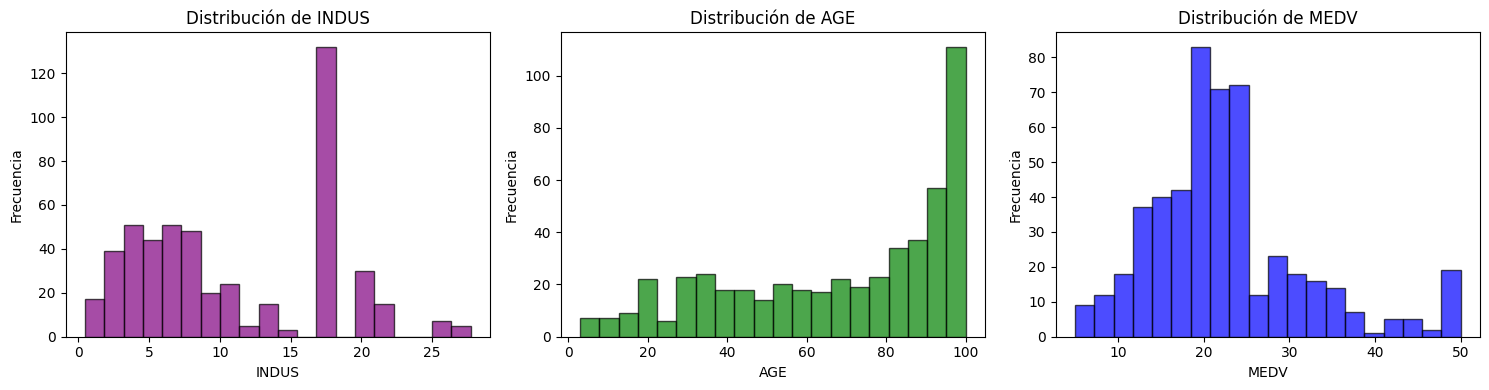

In [3]:
# 1. Calcular la frecuencia de la variable categórica 'CHAS'
frecuencia_chas = df['CHAS'].value_counts()
print("Frecuencia de la variable CHAS:")
print(frecuencia_chas)
print("\n")

# 2. Realizar un gráfico de barras para 'CHAS'
plt.figure(figsize=(6, 4))
plt.bar(frecuencia_chas.index.astype(str), frecuencia_chas.values, color=['skyblue', 'orange'])
plt.title('Distribución de la variable CHAS')
plt.xlabel('Clase (0 = No río, 1 = Río)')
plt.ylabel('Frecuencia')
plt.show()


# --- Análisis de Variables Numéricas ---
# 3. Calcular estadísticos descriptivos básicos
print("Estadísticos descriptivos básicos:")
display(df.describe())

# 4. Realizar histogramas para las variables INDUS, AGE y MEDV
plt.figure(figsize=(15, 4))

# Histograma para INDUS
plt.subplot(1, 3, 1)
plt.hist(df['INDUS'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribución de INDUS')
plt.xlabel('INDUS')
plt.ylabel('Frecuencia')

# Histograma para AGE
plt.subplot(1, 3, 2)
plt.hist(df['AGE'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribución de AGE')
plt.xlabel('AGE')
plt.ylabel('Frecuencia')

# Histograma para MEDV
plt.subplot(1, 3, 3)
plt.hist(df['MEDV'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

He escogido la variable $CHAS$ como categórica principal pero esta muestra un desbalance que de 506 casos el 93% es decir 471 no estan cerca del rio y solo 35 que es el 7% lo estan, lo que a futuro en un entrenamiento de prueba al separar se deberia tener cuidado por estos dos grupos que existe una diferencia muy grande.


*   Con la variable $AGE$ se puede mencionar que Boston tiene casas muy antiguas con una media de 68 años lo que idnica que mas de la mitad de las casas fueron construidas antes de 1940(segun definicion de la variable)


*   Variable objetivo (MEDV)
El precio medio de una casa ronda en 22500 USD





### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

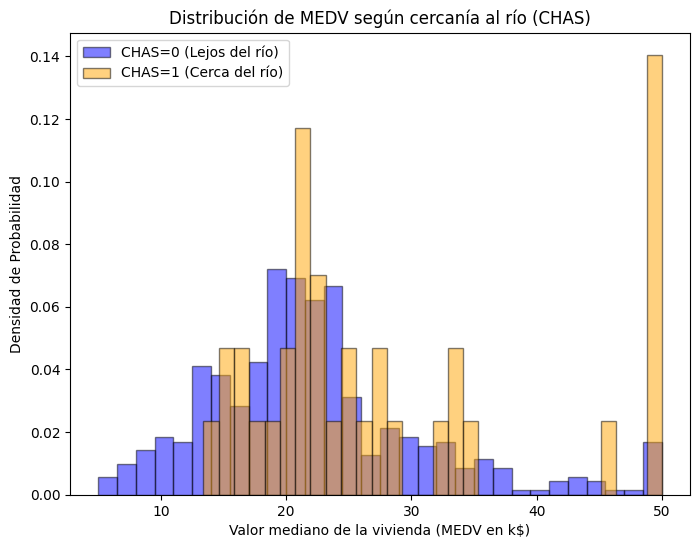

In [4]:
# Separamos los datos de MEDV según el valor de CHAS
medv_chas_0 = df[df['CHAS'] == 0]['MEDV']
medv_chas_1 = df[df['CHAS'] == 1]['MEDV']

# Configuración del gráfico
plt.figure(figsize=(8, 6))

# Histograma para CHAS = 0 (Lejos del río)
plt.hist(medv_chas_0, bins=30, alpha=0.5, density=True,
         label='CHAS=0 (Lejos del río)', color='blue', edgecolor='black')

# Histograma para CHAS = 1 (Cerca del río)
plt.hist(medv_chas_1, bins=30, alpha=0.5, density=True,
         label='CHAS=1 (Cerca del río)', color='orange', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución de MEDV según cercanía al río (CHAS)')
plt.xlabel('Valor mediano de la vivienda (MEDV en k$)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el gráfico
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Pues mirando el grafico puedo concluir que el atributo CHAS si tiene peso pero tambien tiene que verse con cuidado ya que este grafico tiene areas sombreadas que puedo decir que la distribucion de color naranja (casas cerca del rio) esta mas hacia la derecha en comparacion con la azul, entonces a mi parecer estar cerca del rio parece ser un plus en el valor del precio de la casa. Peor cabe mencionar que como son muy pocos datos a lo mejor no es la variable que mas decide el precio pero tiene su ayufa.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


Correlación de los atributos numéricos con MEDV:

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


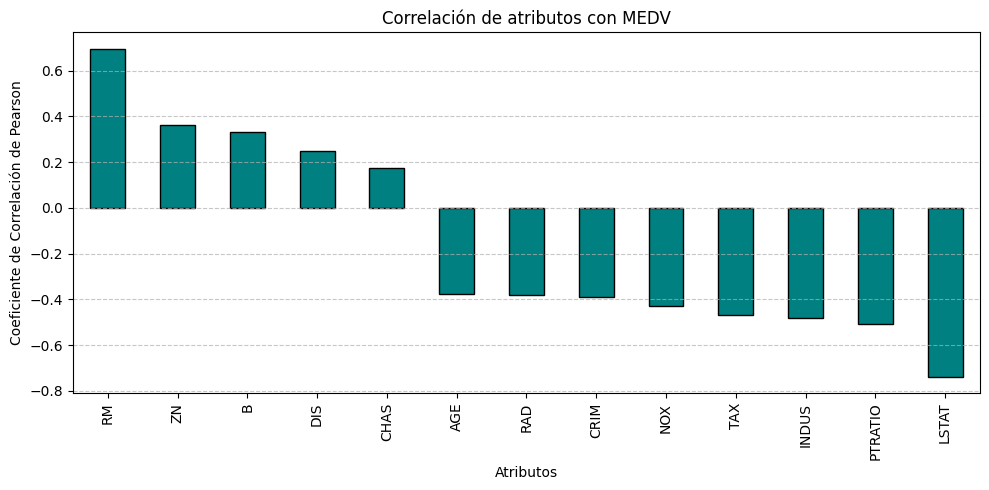

In [5]:
# 1. Calcular la matriz de correlación entre todos los atributos numéricos
correlation_matrix = df.corr()

# 2. Seleccionar la correlación específica con la variable respuesta 'MEDV' y ordenarla
medv_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)

# Mostrar los valores numéricos
print("Correlación de los atributos numéricos con MEDV:\n")
print(medv_correlations)

# 3. Gráfico de barras de las correlaciones (excluyendo MEDV consigo misma)
plt.figure(figsize=(10, 5))
medv_correlations.drop('MEDV').plot(kind='bar', color='teal', edgecolor='black')

plt.title('Correlación de atributos con MEDV')
plt.xlabel('Atributos')
plt.ylabel('Coeficiente de Correlación de Pearson')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


Generando gráfico de pares... Esto puede tomar unos segundos.


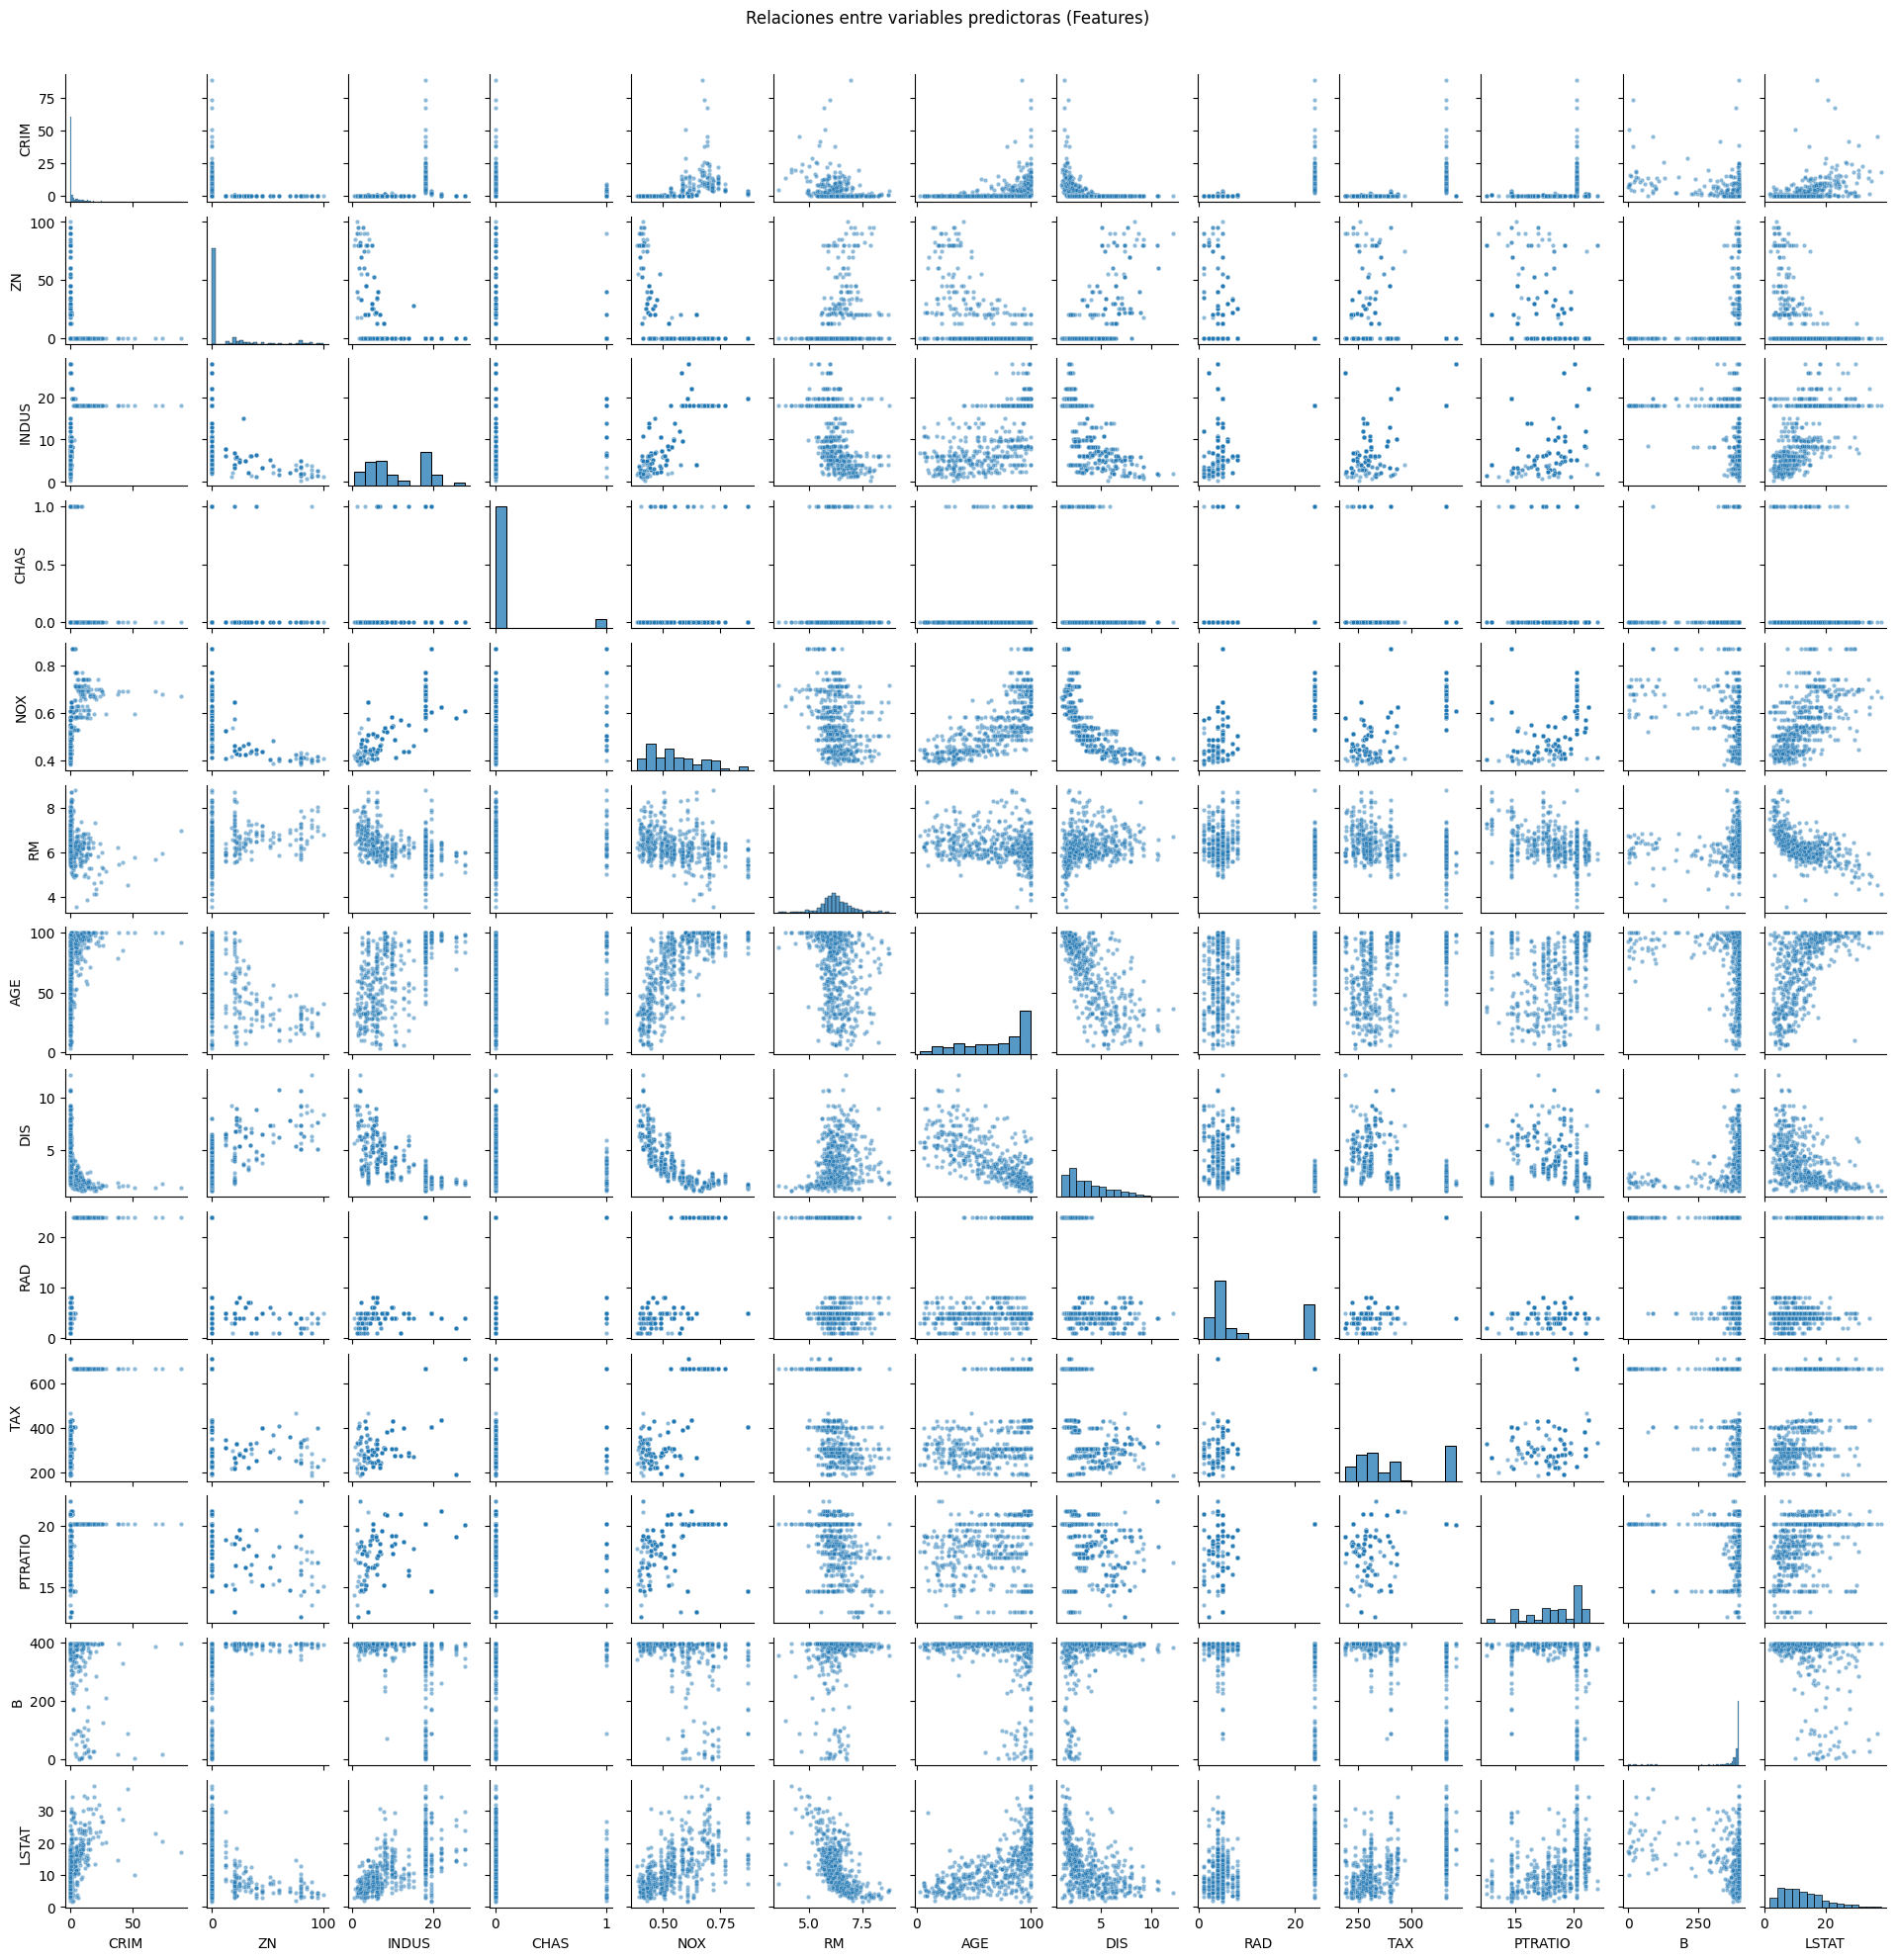

In [7]:
# Excluimos 'MEDV' porque queremos ver relaciones entre predictores
features = df.columns.drop(['MEDV'])

# 2. Generar el gráfico de pares (Pairplot)
print("Generando gráfico de pares... Esto puede tomar unos segundos.")
g = sns.pairplot(df[features], height=1.5, plot_kws={'alpha': 0.5, 's': 10}, diag_kind='hist')

# Ajustar título
g.fig.suptitle("Relaciones entre variables predictoras (Features)", y=1.02)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


Las 2 variables con correlación más FUERTE: ['LSTAT', 'RM']
Las 2 variables con correlación más DÉBIL: ['DIS', 'CHAS']


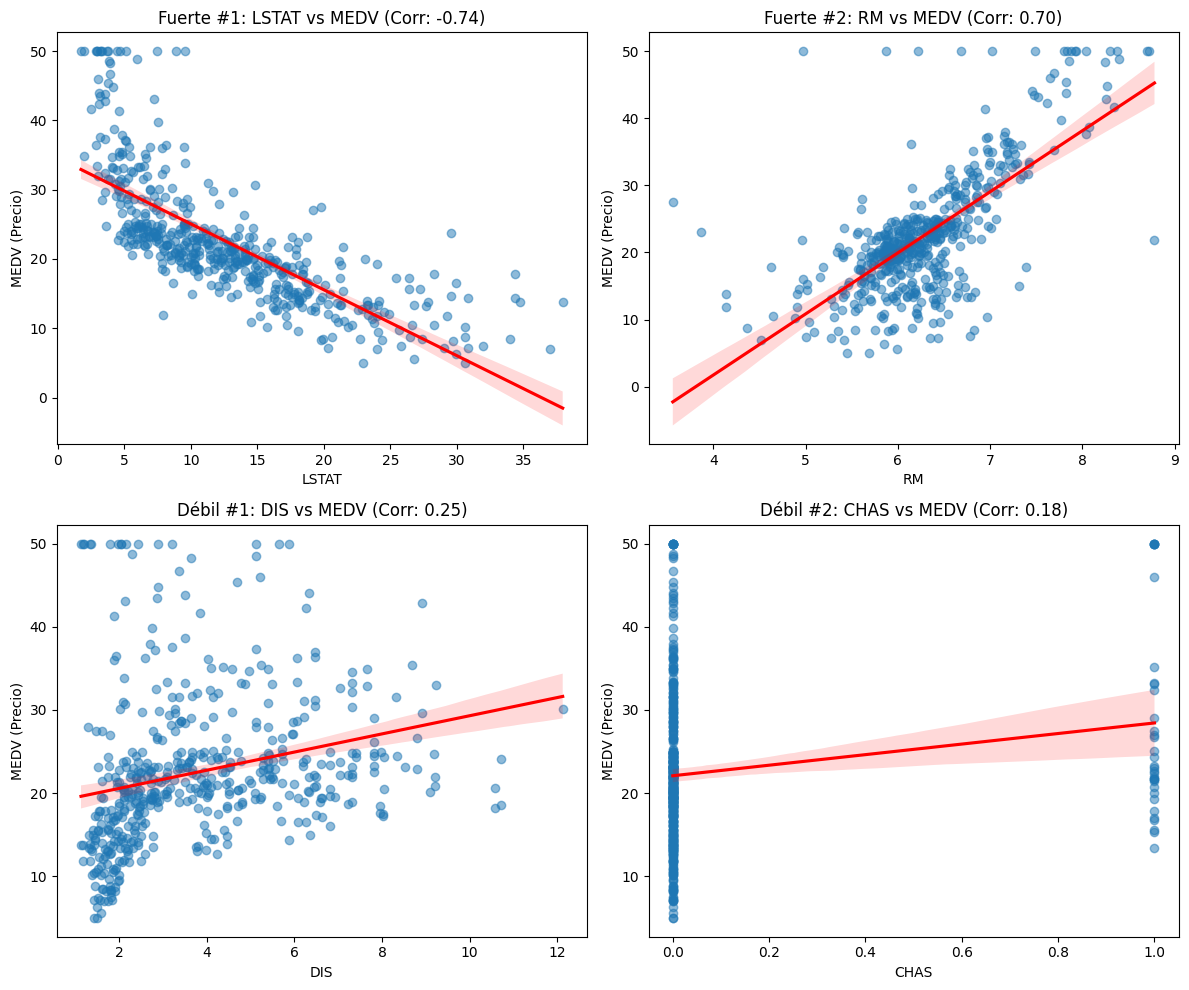

In [8]:
# Calculamos el valor absoluto de la correlación con MEDV y ordenamos
correlaciones = df.corr()['MEDV'].drop('MEDV') # Excluimos MEDV consigo misma
abs_corrs = correlaciones.abs().sort_values(ascending=False)

# Seleccionamos las 2 primeras (más fuertes) y las 2 últimas (más débiles)
top_2_fuertes = abs_corrs.head(2).index.tolist()
bottom_2_debiles = abs_corrs.tail(2).index.tolist()

print(f"Las 2 variables con correlación más FUERTE: {top_2_fuertes}")
print(f"Las 2 variables con correlación más DÉBIL: {bottom_2_debiles}")

# 2. Visualización con regplot
# Unimos las listas para graficar las 4
variables_a_graficar = top_2_fuertes + bottom_2_debiles
titulos = ['Fuerte #1', 'Fuerte #2', 'Débil #1', 'Débil #2']

plt.figure(figsize=(12, 10))

for i, col in enumerate(variables_a_graficar):
    plt.subplot(2, 2, i + 1)

    # Usamos regplot como sugeriste: grafica puntos + línea de regresión
    sns.regplot(x=df[col], y=df['MEDV'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

    plt.title(f'{titulos[i]}: {col} vs MEDV (Corr: {correlaciones[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('MEDV (Precio)')

plt.tight_layout()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Osea se puede destacar que las variables mas fuertes son RM Y LSTAT por una parte rm se puede consluir que con mas cuartos en una casa mayor es el precio y con LSTAT que se puede concluir que la pobreza del barrio afecta en el precio de la casa.
Las mas debiles son DIS Y CHAS que DIS se ve que la line trata de ajustarse pero no importa tanto si estás lejos o cerca del trabajo, el precio puede ser cualquiera y por CHAS se ve raro porque si sube un pco el precio pero es muy leve la diferencia del mismo

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


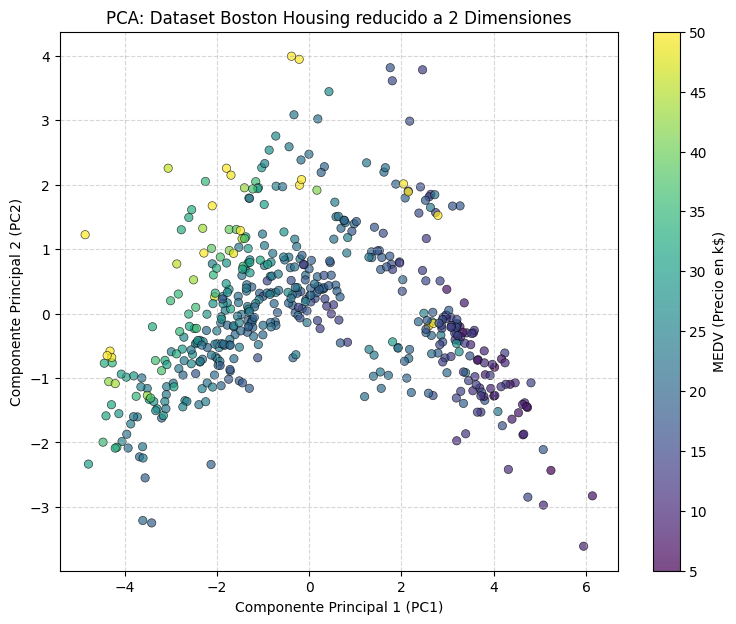

Varianza explicada por componente: [0.47129606 0.11025193]
Varianza total explicada: 58.15%


In [10]:
# 1. Separar las variables predictoras (X) de la variable objetivo (y)
# Excluimos 'MEDV' para la reducción
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# 2. Estandarización (Paso obligatorio antes de PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales para facilitar el manejo
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# 4. Generar el gráfico de dispersión
plt.figure(figsize=(9, 7))

# El parámetro 'c' asigna el color según los valores de 'y' (MEDV)
# 'cmap' define la paleta de colores (viridis es buena para escalas continuas)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.title('PCA: Dataset Boston Housing reducido a 2 Dimensiones')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')

# Añadir barra de colores para interpretar el precio
cbar = plt.colorbar()
cbar.set_label('MEDV (Precio en k$)')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

# (Opcional) Ver cuánta información retuvimos
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)*100:.2f}%")

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


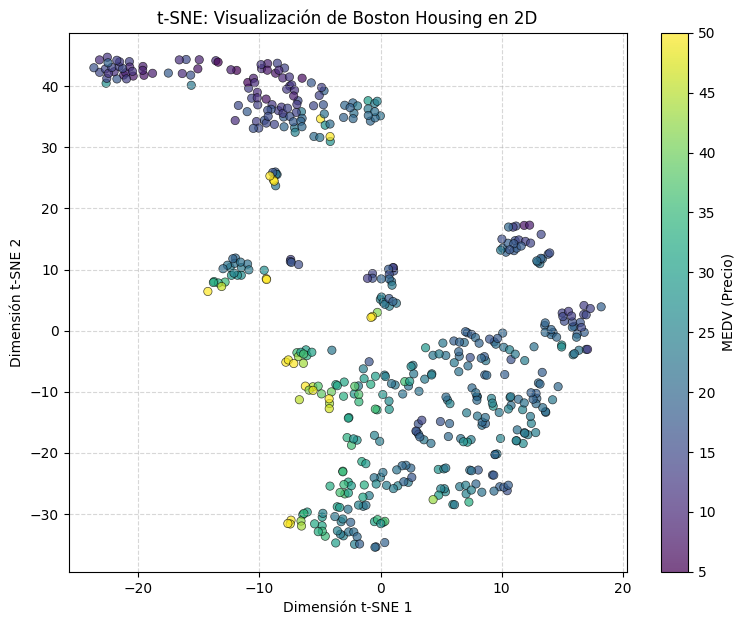

In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Preparar los datos (igual que en PCA, ¡siempre escalar primero!)
# Asumimos que X (features) y y (target) ya están cargados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Aplicar t-SNE
# perplexity=30: Balancea la atención entre lo local y lo global.
# n_iter=1000: Número de iteraciones para que el algoritmo converja.
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42, init='random')
X_tsne = tsne.fit_transform(X_scaled)

# 3. Generar el gráfico de dispersión
plt.figure(figsize=(9, 7))

# Usamos 'c=y' para colorear por precio (MEDV)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis',
                      alpha=0.7, edgecolors='k', linewidth=0.5)

plt.title('t-SNE: Visualización de Boston Housing en 2D')
plt.xlabel('Dimensión t-SNE 1')
plt.ylabel('Dimensión t-SNE 2')

# Barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('MEDV (Precio)')

plt.grid(linestyle='--', alpha=0.5)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


De lo que puedo entender es que el tipo t-SNE es una forma mas microscopica que seria mejor para ver con mas detalles y agrupar de mejor forma mientras que el PCA es mas general es mas fiable para usarlo con cosas a futuro es decir posibles predicciones

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [13]:
from sklearn.model_selection import train_test_split
# REEMPLAZA ESTE VALOR con el último número de tu cédula
cedula = 5  # Ejemplo: si termina en 5. ¡Cámbialo!

# --- 1. División para el Conjunto de Datos ORIGINAL ---
# X: Son las 13 variables originales (sin MEDV)
# y: Es la variable objetivo (MEDV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=cedula)

# --- 2. División para el Conjunto de Datos PCA ---
# X_pca: Son las 2 componentes principales (PC1, PC2)
# y: Es la misma variable objetivo (MEDV)
# Usamos el MISMO random_state para que la comparación sea justa (mismas filas en train/test)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=cedula)

# --- 3. Visualización de Dimensiones ---
print(f"--- División de datos usando random_state = {cedula} ---\n")

print("1. CONJUNTO ORIGINAL (13 atributos):")
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

print("\n2. CONJUNTO REDUCIDO PCA (2 atributos):")
print('X_train_pca:', X_train_pca.shape)
print('y_train_pca:', y_train_pca.shape) # y_train debe ser igual en tamaño al de arriba
print('X_test_pca:', X_test_pca.shape)   # y_test debe ser igual en tamaño al de arriba
print('y_test_pca:', y_test_pca.shape)

--- División de datos usando random_state = 5 ---

1. CONJUNTO ORIGINAL (13 atributos):
X_train: (404, 13)
y_train: (404,)
X_test: (102, 13)
y_test: (102,)

2. CONJUNTO REDUCIDO PCA (2 atributos):
X_train_pca: (404, 2)
y_train_pca: (404,)
X_test_pca: (102, 2)
y_test_pca: (102,)


### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
# 1. Configuración y División de datos (Originales)
# Aseguramos usar el mismo random_state que definiste antes
cedula = 5  # Reemplaza si es necesario
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=cedula)

# 2. Definir el modelo
modelo = LinearRegression()

# 3. Validación Cruzada - Métrica R2 (Coeficiente de Determinación)
# cv=5 crea 5 particiones
scores_r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')

# 4. Validación Cruzada - Métrica MAE (Error Absoluto Medio)
# Usamos 'neg_mean_absolute_error' y luego lo convertimos a positivo
scores_mae = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# --- REPORTE DE RESULTADOS ---

print(f"--- Resultados de Validación Cruzada (k=5) ---")

# R2
print("\n1. Coeficiente de Determinación (R2):")
print(f"   Scores individuales: {scores_r2}")
print(f"   Media: {scores_r2.mean():.4f}")
print(f"   Desviación Estándar: {scores_r2.std():.4f}")

# MAE (Convertimos a positivo para interpretar el error)
mae_real = -scores_mae
print("\n2. Media del Error Absoluto (MAE):")
print(f"   Scores individuales (k$): {mae_real}")
print(f"   Media: {mae_real.mean():.4f} k$")
print(f"   Desviación Estándar: {mae_real.std():.4f} k$")

--- Resultados de Validación Cruzada (k=5) ---

1. Coeficiente de Determinación (R2):
   Scores individuales: [0.62046964 0.72544544 0.78930049 0.59343058 0.78074794]
   Media: 0.7019
   Desviación Estándar: 0.0810

2. Media del Error Absoluto (MAE):
   Scores individuales (k$): [3.94970795 3.16295145 3.1078219  4.12617574 3.2127036 ]
   Media: 3.5119 k$
   Desviación Estándar: 0.4344 k$


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [20]:
# 1. Definir el modelo
modelo_pca = LinearRegression()

# 2. Validación Cruzada - Métrica R2 (Datos reducidos PCA)
# ¡Importante! Usamos X_train_pca en lugar de X_train
scores_r2_pca = cross_val_score(modelo_pca, X_train_pca, y_train, cv=5, scoring='r2')

# 3. Validación Cruzada - Métrica MAE (Datos reducidos PCA)
scores_mae_pca = cross_val_score(modelo_pca, X_train_pca, y_train, cv=5, scoring='neg_mean_absolute_error')

# --- REPORTE DE RESULTADOS (PCA) ---

print(f"--- Resultados de Validación Cruzada con PCA (k=5) ---")

# R2
print("\n1. Coeficiente de Determinación (R2):")
print(f"   Scores individuales: {scores_r2_pca}")
print(f"   Media: {scores_r2_pca.mean():.4f}")
print(f"   Desviación Estándar: {scores_r2_pca.std():.4f}")

# MAE (Convertimos a positivo)
mae_real_pca = -scores_mae_pca
print("\n2. Media del Error Absoluto (MAE):")
print(f"   Scores individuales (k$): {mae_real_pca}")
print(f"   Media: {mae_real_pca.mean():.4f} k$")
print(f"   Desviación Estándar: {mae_real_pca.std():.4f} k$")

--- Resultados de Validación Cruzada con PCA (k=5) ---

1. Coeficiente de Determinación (R2):
   Scores individuales: [0.33394254 0.39435235 0.53977619 0.40834804 0.5057846 ]
   Media: 0.4364
   Desviación Estándar: 0.0756

2. Media del Error Absoluto (MAE):
   Scores individuales (k$): [5.91442369 4.87645977 4.55024702 4.67024787 4.90605708]
   Media: 4.9835 k$
   Desviación Estándar: 0.4837 k$


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


Se puede decir que para predecir el precio que es lo importante el modelo no ayudo en nada que pudo ser mucho mejor en visualizar pero al momento de decir si es eficaz pues no lo es.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [25]:
from sklearn.metrics import r2_score, mean_absolute_error

# Usamos X_train (13 variables), NO X_train_pca
mejor_modelo = LinearRegression()
mejor_modelo.fit(X_train, y_train)

# 2. Generar predicciones sobre el dataset de test (X_test)
y_pred_test = mejor_modelo.predict(X_test)

# 3. Calcular métricas de precisión
r2_final = r2_score(y_test, y_pred_test)
mae_final = mean_absolute_error(y_test, y_pred_test)

# Mostrar resultados
print("--- Evaluación Final en el Conjunto de Prueba (Test Set) ---")
print(f"Modelo seleccionado: Regresión Lineal con todas las variables")
print(f"R2 Score (Coeficiente de determinación): {r2_final:.4f}")
print(f"MAE (Error absoluto medio): {mae_final:.4f} k$")

--- Evaluación Final en el Conjunto de Prueba (Test Set) ---
Modelo seleccionado: Regresión Lineal con todas las variables
R2 Score (Coeficiente de determinación): 0.7334
MAE (Error absoluto medio): 3.2133 k$


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Usaria MAE ya que se quiere saber cuanta plata podemos perder por algun error y para el analista matematico usaria el r2 para demostrar la robustez estadistica

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


# 1. Preparación de datos
# Objetivo: 'CHAS'. Variables predictoras: Todas menos CHAS.
X = df.drop('CHAS', axis=1)
y = df['CHAS']

# 2. División train/test
# Usamos el mismo random_state para consistencia
cedula = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=cedula)

# 3. Estandarización (Obligatorio para K-Means)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Definir y entrenar el modelo K-means
# n_clusters=2 porque buscamos separar en (Río / No Río)
kmeans = KMeans(n_clusters=2, random_state=cedula, n_init=10)
kmeans.fit(X_train_scaled)

# 5. Predecir los clusters para el conjunto de prueba
y_pred = kmeans.predict(X_test_scaled)

# 6. Calcular métricas
# Nota: La 'Sensibilidad' es lo mismo que el 'Recall'
precision = precision_score(y_test, y_pred, zero_division=0)
sensibilidad = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("--- Resultados de Clasificación con K-Means ---")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\n--- Reporte detallado ---")
print(classification_report(y_test, y_pred, zero_division=0))

--- Resultados de Clasificación con K-Means ---
Precisión: 0.10
Sensibilidad (Recall): 0.86
F1-Score: 0.18

--- Reporte detallado ---
              precision    recall  f1-score   support

           0       0.98      0.43      0.60        95
           1       0.10      0.86      0.18         7

    accuracy                           0.46       102
   macro avg       0.54      0.64      0.39       102
weighted avg       0.92      0.46      0.57       102



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [36]:
# 1. Definir X e y (Objetivo: CHAS)
X = df.drop('CHAS', axis=1)
y = df['CHAS']

# 2. Estandarización y PCA (Reducción a 2 dimensiones)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# 3. Dividir en Train y Test (Sobre los datos reducidos X_pca_2d)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=cedula)

# 4. Entrenar K-Means
kmeans_pca = KMeans(n_clusters=2, random_state=cedula, n_init=10)
kmeans_pca.fit(X_train_pca)

# 5. Predecir y Evaluar
y_pred_pca = kmeans_pca.predict(X_test_pca)

# Cálculo de métricas
precision_pca = precision_score(y_test, y_pred_pca, zero_division=0)
recall_pca = recall_score(y_test, y_pred_pca, zero_division=0)
f1_pca = f1_score(y_test, y_pred_pca, zero_division=0)

print("--- Resultados K-Means con PCA (2 Dimensiones) ---")
print(f"Precisión: {precision_pca:.2f}")
print(f"Sensibilidad (Recall): {recall_pca:.2f}")
print(f"F1-Score: {f1_pca:.2f}")

--- Resultados K-Means con PCA (2 Dimensiones) ---
Precisión: 0.02
Sensibilidad (Recall): 0.14
F1-Score: 0.04


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


1. Para el Ejecutivo de la Inmobiliaria (Negocio)
Métrica a usar: Precisión (Precision).
Valor a mostrar: 2% (0.02). Al ejecutivo le importa el costo de equivocarse (Falsos Positivos). La precisión habla directamente del retorno de inversión (ROI).
2. Para el Analista Matemático (Técnico)
Métrica a usar: F1-Score.El analista entiende que se puede "trucar" la precisión o el recall por separado, el F1-Score es la metrica honesta si cualquiera de las otras dos falla




*   El modelo es (ligeramente) mejor discriminando que acertando, pero es terrible en ambas.


*   Al aplicar PCA y K-Means para clasificar CHAS, eliminamos la información necesaria lo que a la vez la reducción de dimensiones ocultó la característica que queríamos predecir, por eso este es un ejemplo de cuándo NO usar PCA + Clustering para clasificación supervisada.





